## Estudo da correlação entre variáveis e regressão

Na atividade desta semana, vamos revisitar um conjunto de dados já utilizado "bodyfat.csv".

(1) Dentre as variáveis apresentadas no arquivo, existe alguma no quais os dados não estejam bem distribuídos (utilizem os seus conhecimentos de estatística descritiva)?

(2) O conjunto de dados é uma importante ferramenta para estudo sobre obesidade. É possível que haja correlação entre as variáveis e o nível de gordura corporal (variável BodyFat). Faça o gráfico de dispersão de cada uma das variáveis com a variável BodyFat e calcule a correlação.

(3) Dos resultados encontrados, qual você indicaria para compor um modelo numérico para prever a gordura corporal? Explique os motivos da escolha baseados nas informações calculadas anteriormente.

(4) PONTO EXTRA: A partir das informações anteriores, tente achar uma reta de regressão com as variáveis encontradas no item anterior

In [2]:
import pandas as pd
import statistics as sta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dados = pd.read_csv('bodyfat.csv')
df_dados = pd.DataFrame(dados)
dados.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
cols = ['Density',	'Age',	'Weight',	'Height',	'Neck',	'Chest',	'Abdomen',	'Hip',	'Thigh',	'Knee',	'Ankle',	'Biceps',	'Forearm',	'Wrist']

In [4]:
df_dados.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


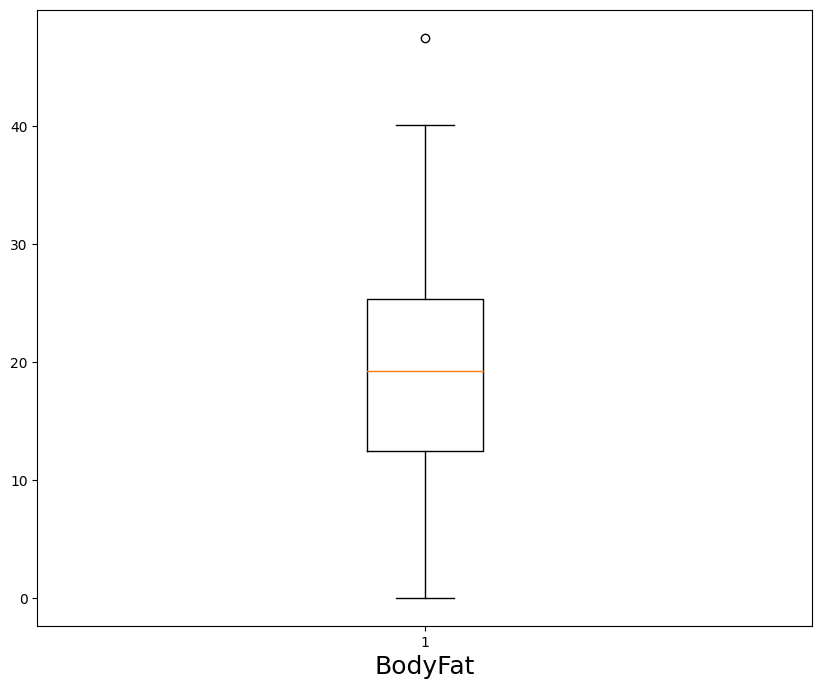

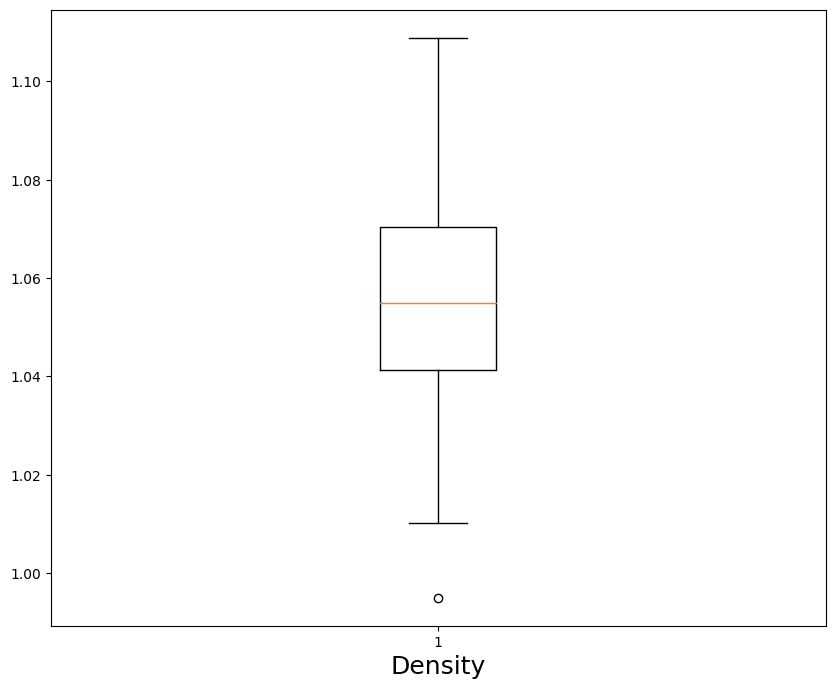

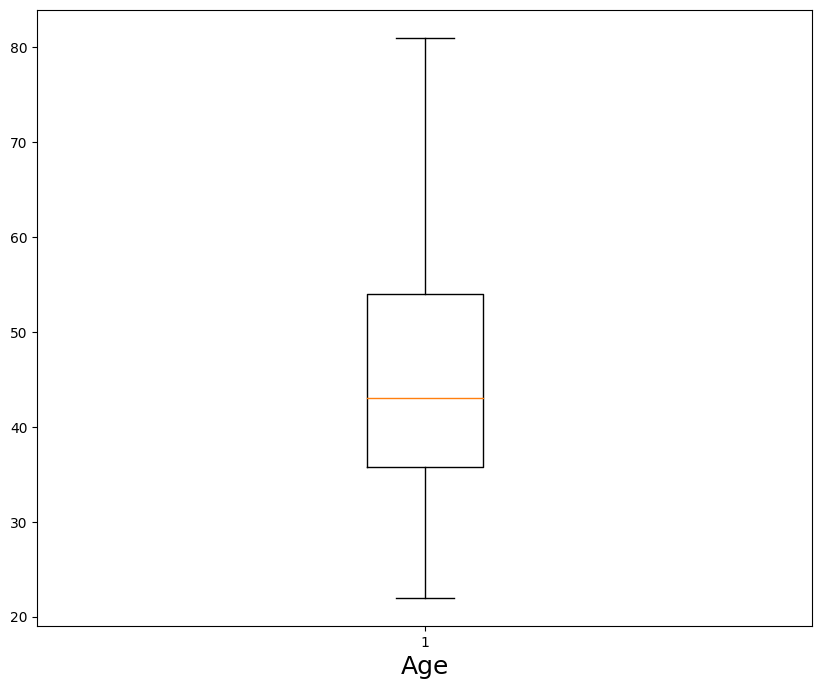

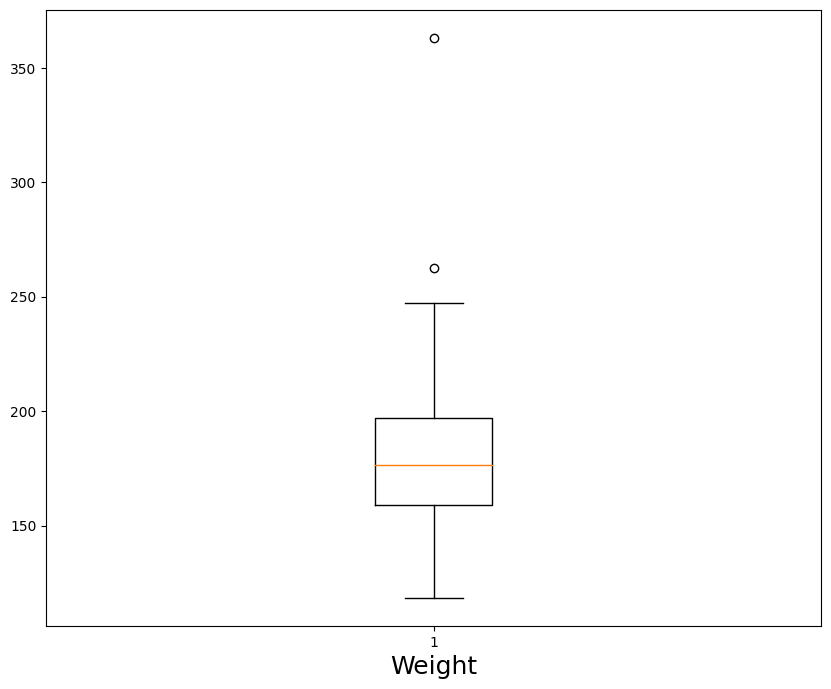

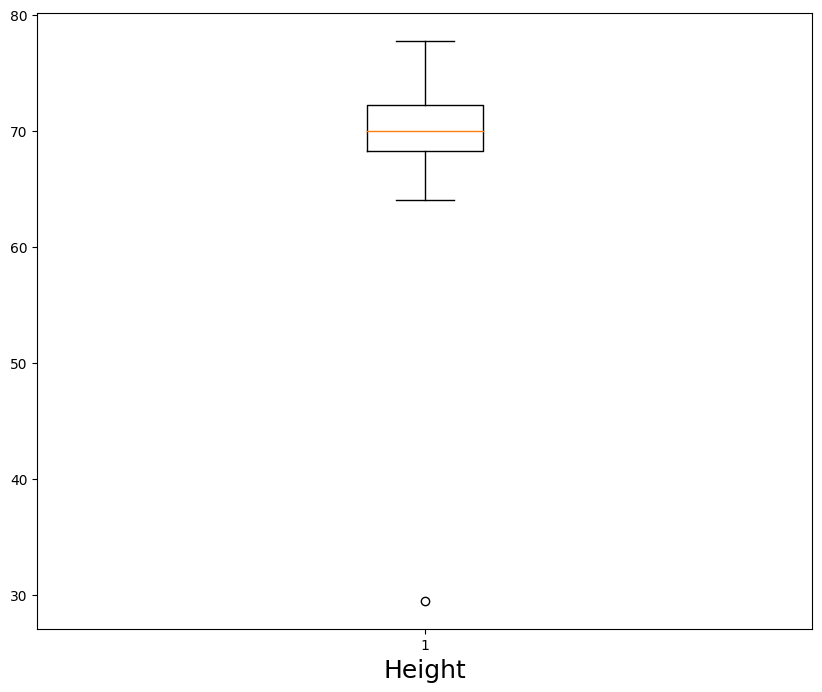

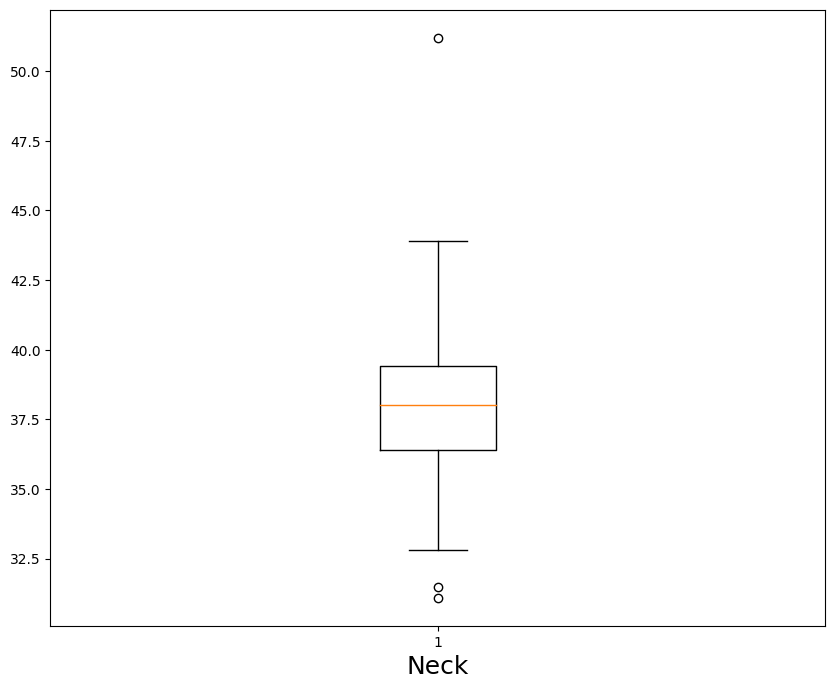

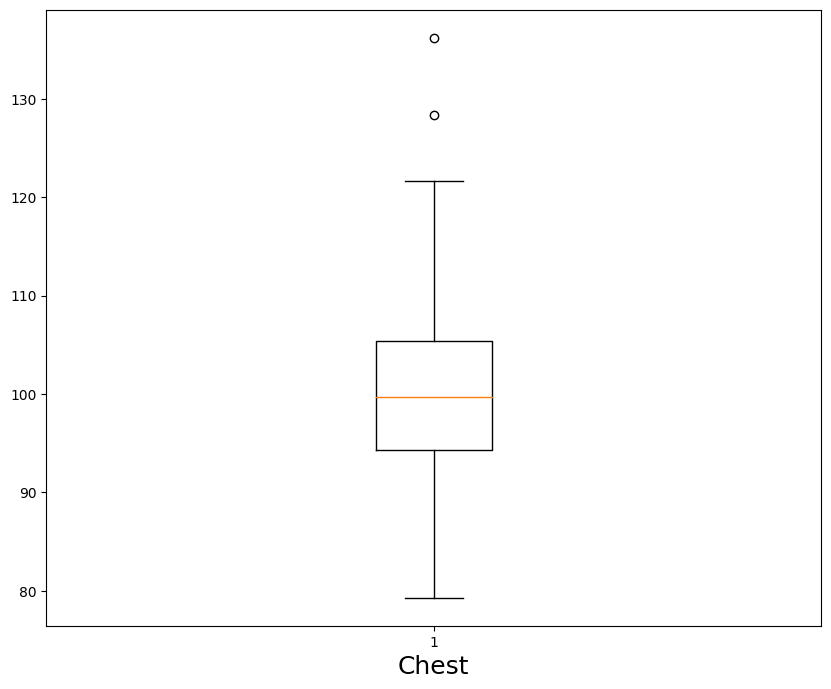

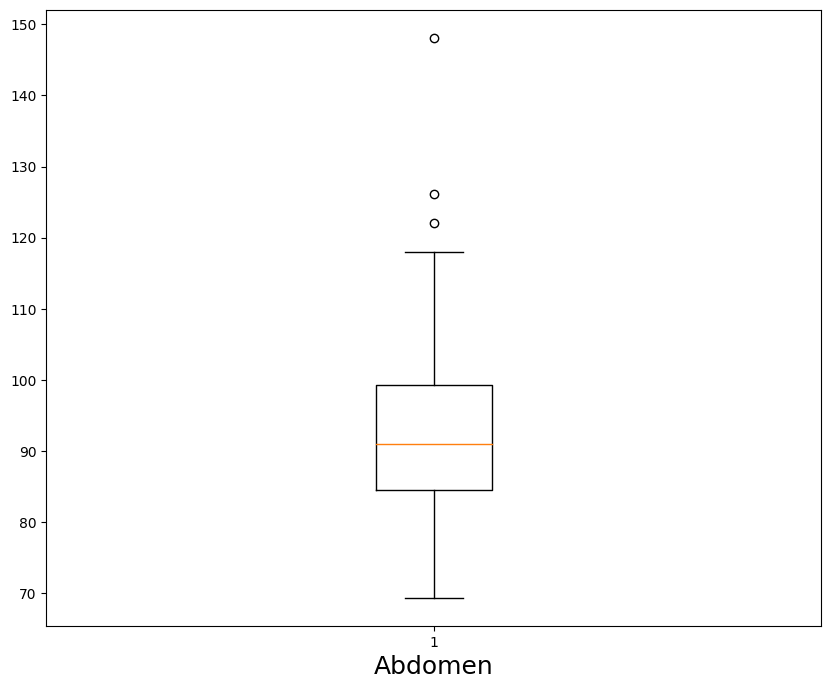

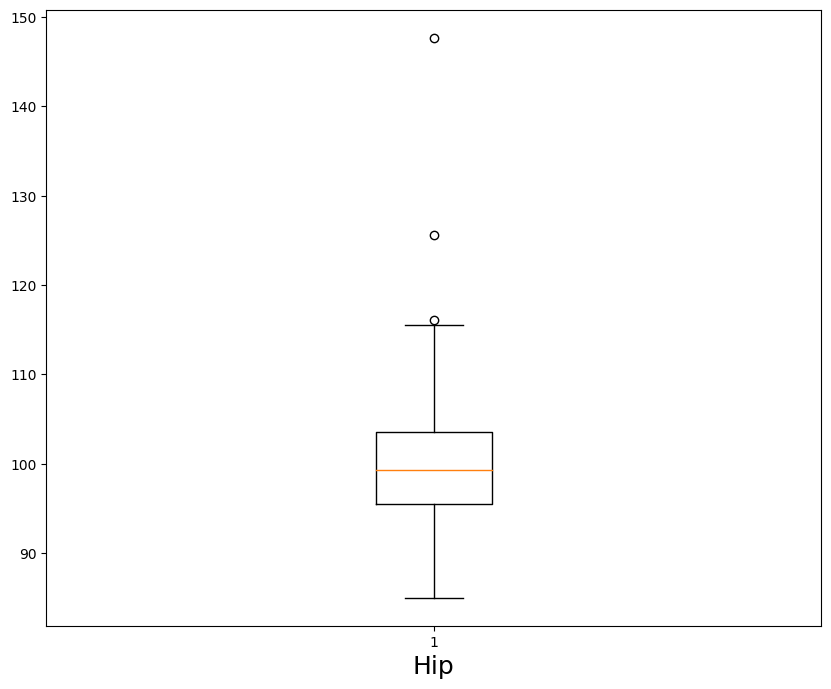

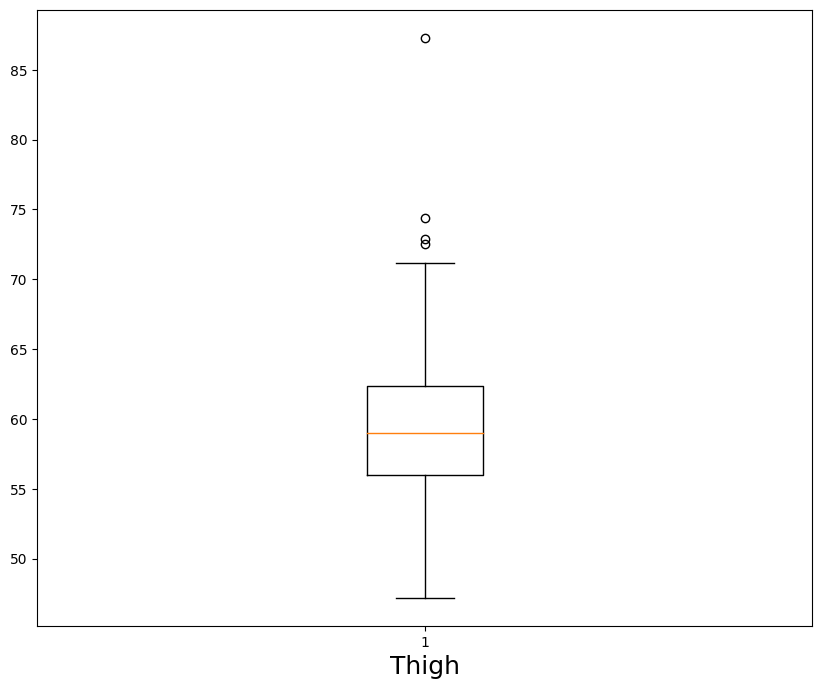

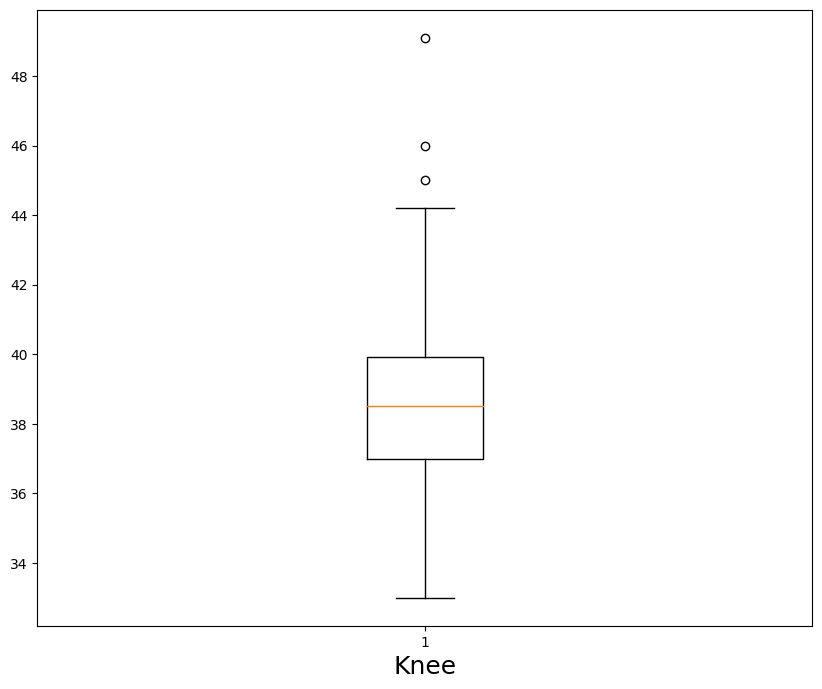

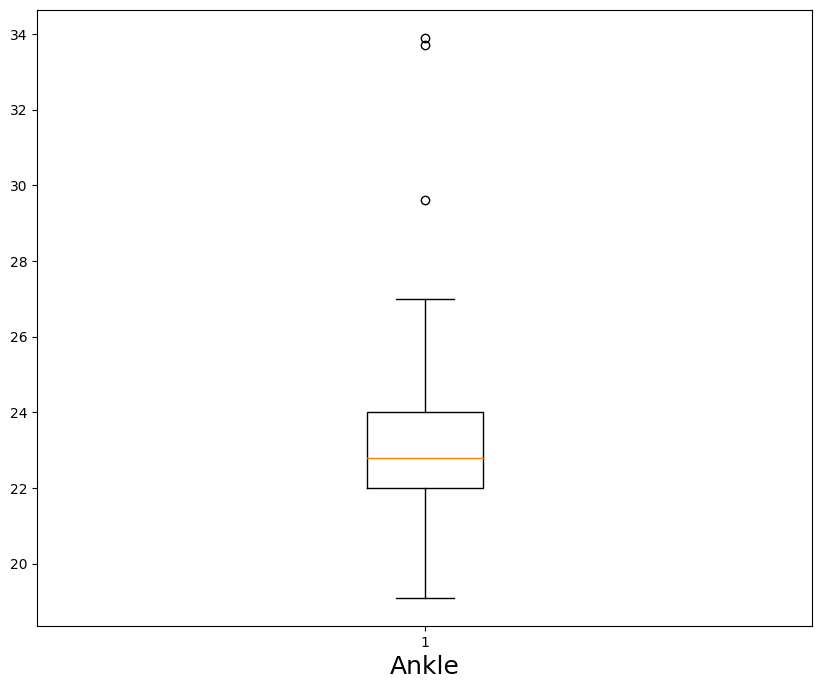

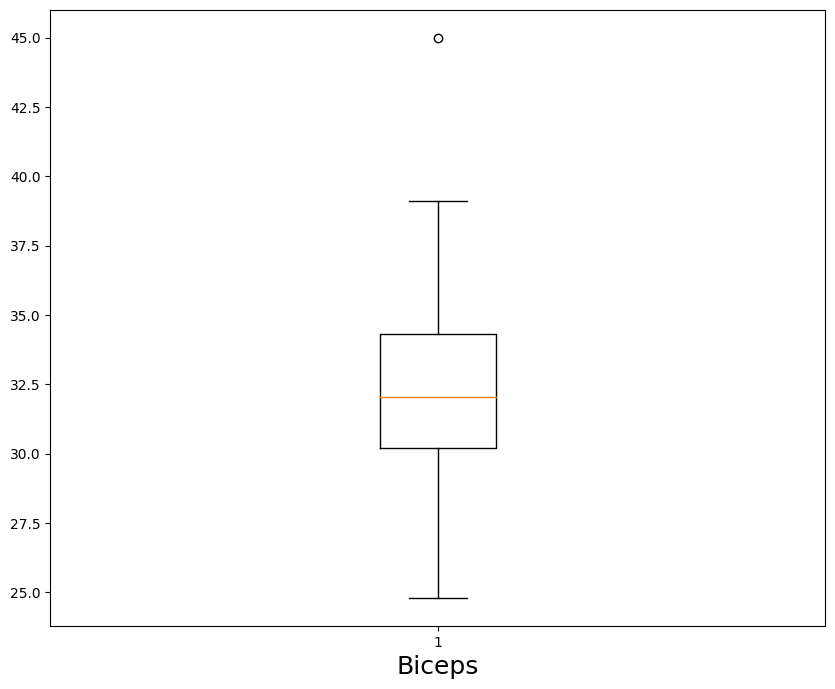

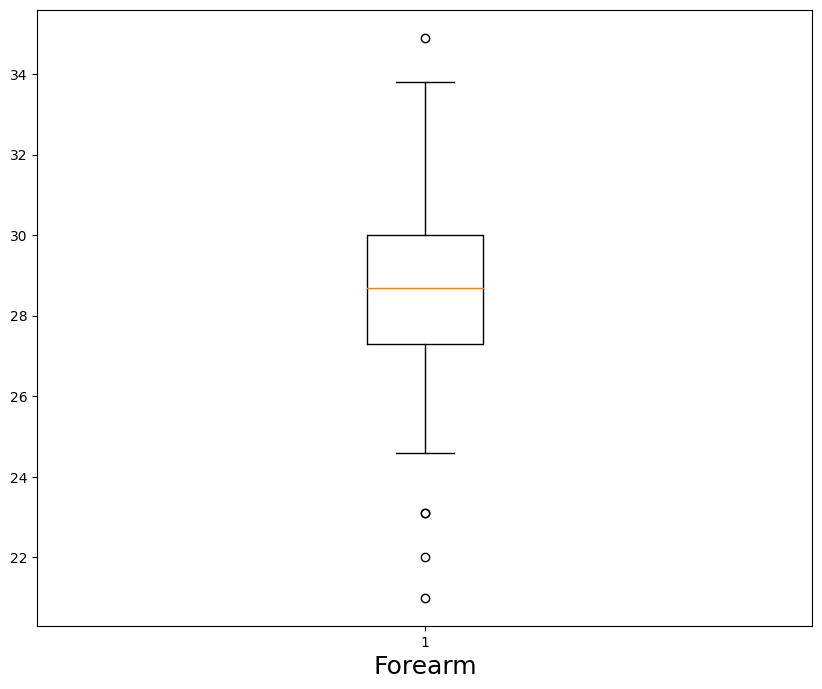

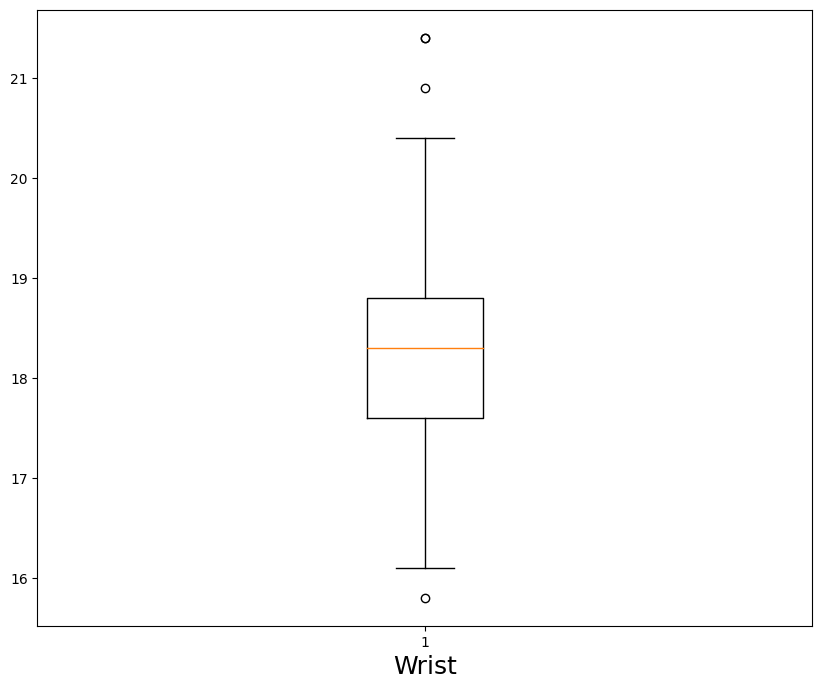

In [14]:
plt.figure(figsize=(10, 8))
plt.boxplot(dados['BodyFat'], vert=True, meanline=True)
plt.xlabel('BodyFat', loc="center", fontsize=18)
plt.show()
print("\n")
for coluna in cols:
  plt.figure(figsize=(10, 8))
  plt.boxplot(dados[coluna], vert=True, meanline=True)
  plt.xlabel(coluna, loc="center", fontsize=18)
  plt.show()
  print("\n")

In [15]:
"""
Sim. Há algumas variáveis que possuem outliers com uma variação imensa quando comparados a média o que é um sinal de dados não estão bem distribuídos.
Um exemplo é a altura, a qual possúi um outlier extremamente distante da média.
"""

'\nSim. Há algumas variáveis que possuem outliers com uma variação imensa quando comparados a média o que é um sinal de dados não estão bem distribuídos.\nUm exemplo é a altura que possui um outlier extremamente distante da média\n'

In [13]:
for coluna in cols:
  print(df_dados[[coluna, "BodyFat"]].corr().drop(labels=[coluna], axis=1).drop(labels=['BodyFat'], axis=0), "\n")

          BodyFat
Density -0.987782 

      BodyFat
Age  0.291458 

         BodyFat
Weight  0.612414 

         BodyFat
Height -0.089495 

       BodyFat
Neck  0.490592 

       BodyFat
Chest  0.70262 

          BodyFat
Abdomen  0.813432 

      BodyFat
Hip  0.625201 

        BodyFat
Thigh  0.559608 

       BodyFat
Knee  0.508665 

       BodyFat
Ankle  0.26597 

         BodyFat
Biceps  0.493271 

          BodyFat
Forearm  0.361387 

        BodyFat
Wrist  0.346575 



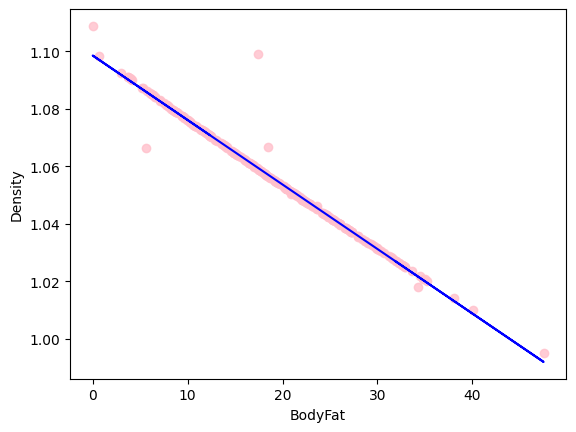

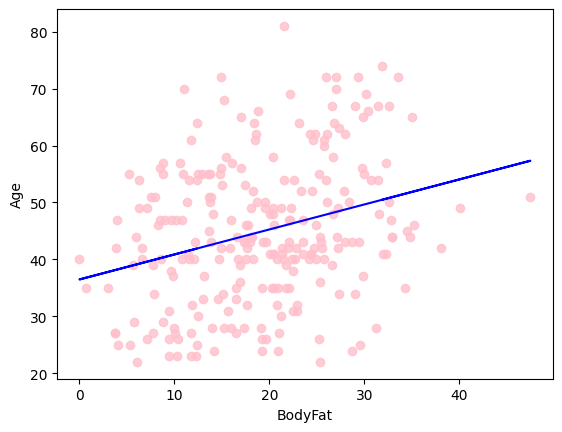

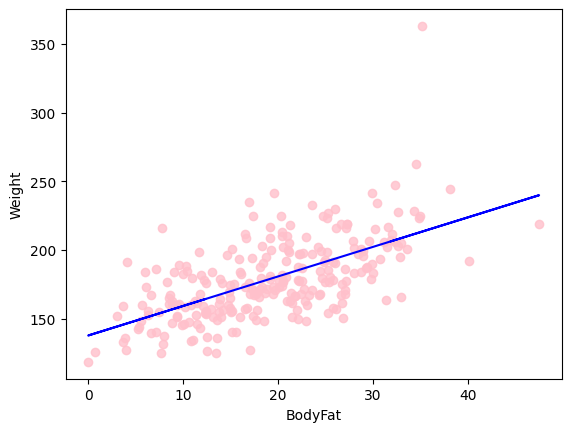

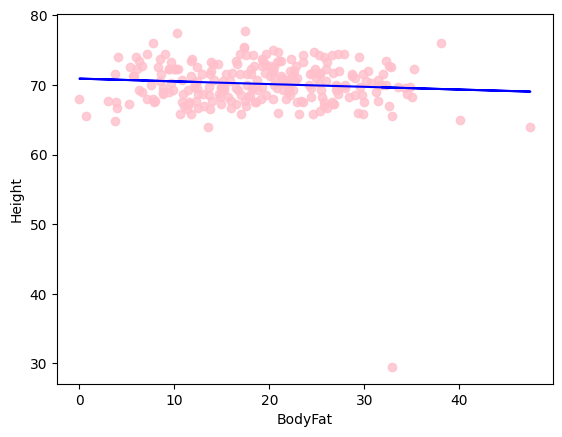

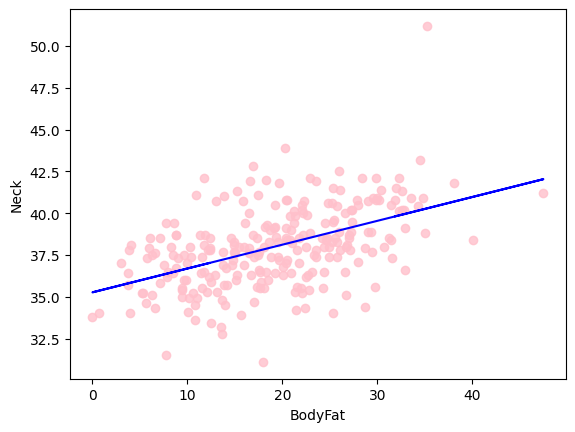

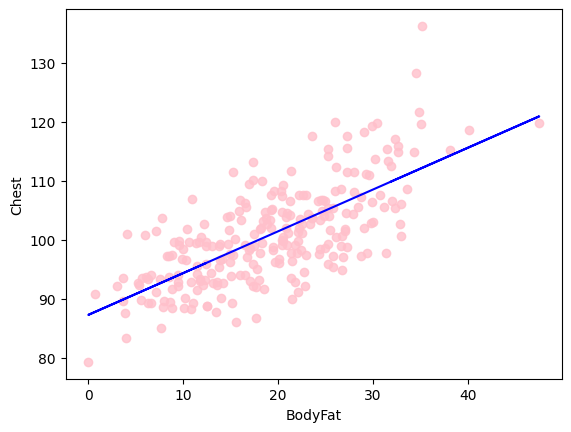

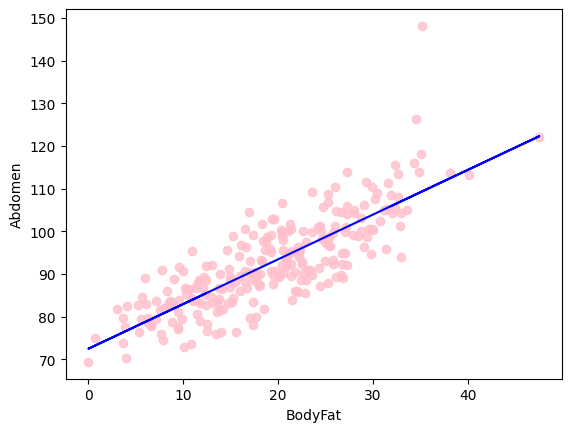

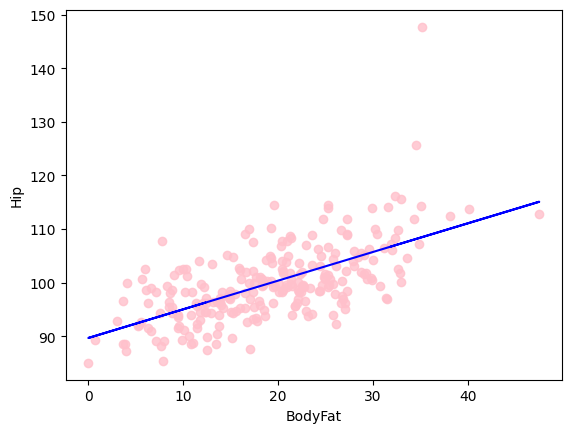

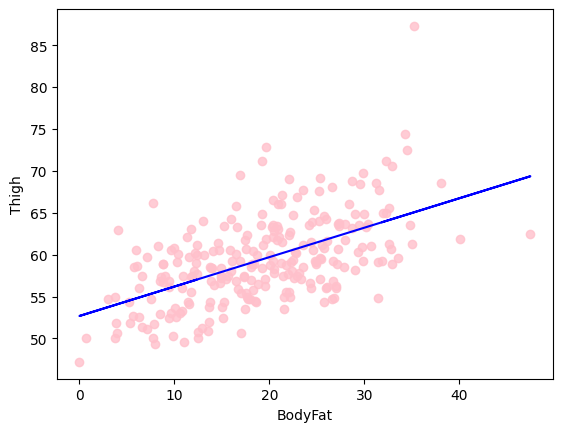

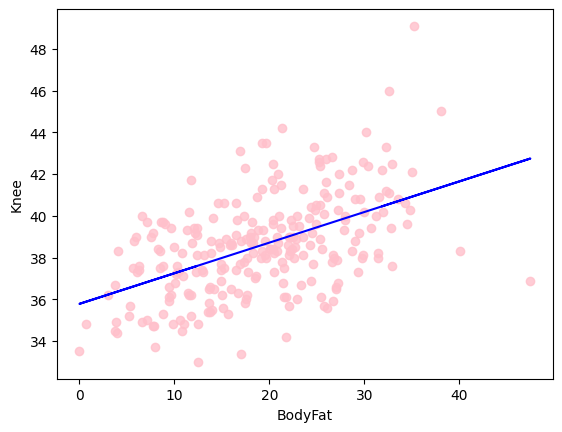

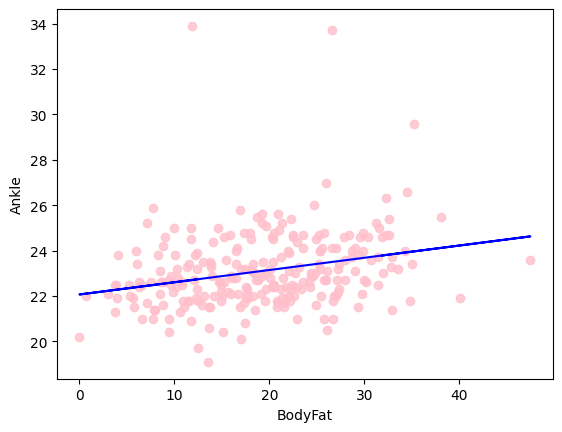

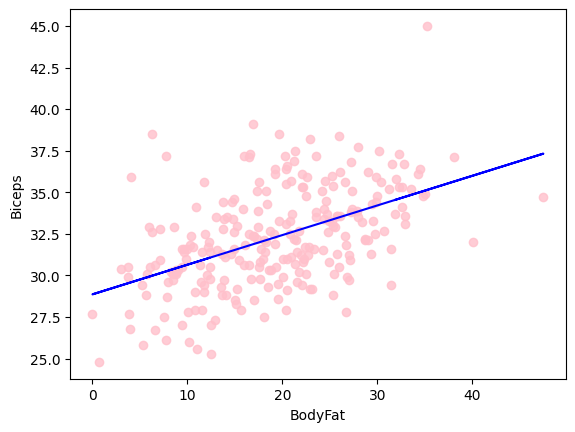

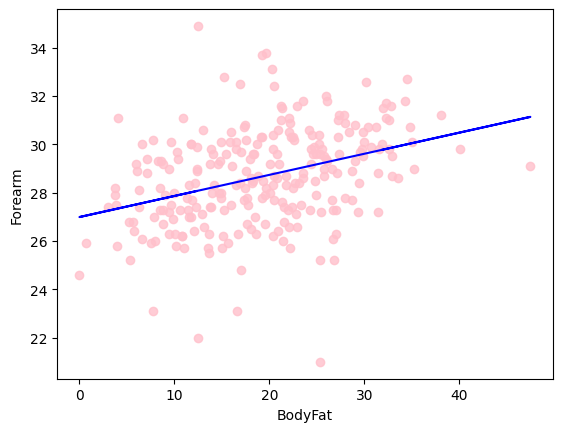

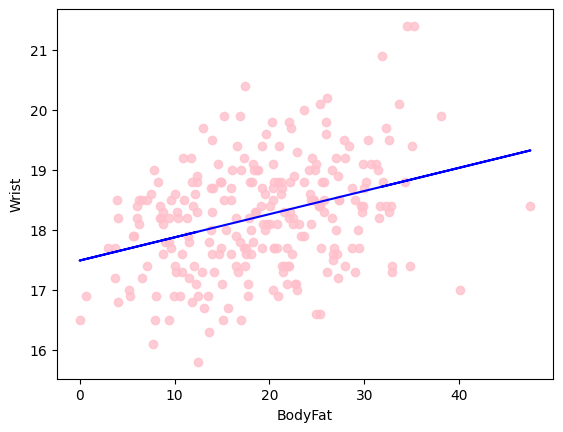

In [12]:
for coluna in cols:
  # Cálculo da reta de regressão
  coef = np.polyfit(dados['BodyFat'], dados[coluna], 1)
  poly = np.poly1d(coef)

  # Montando o gráfico de dispersão com a reta de regressão
  plt.scatter(dados['BodyFat'], dados[coluna], alpha=0.8, color='pink', label='Dados')
  plt.plot(dados['BodyFat'], poly(dados['BodyFat']), color='blue', label='Reta de Regressão')
  plt.xlabel('BodyFat')
  plt.ylabel(coluna)

  plt.show()
  print("\n")

In [8]:
"""
Eu recomendaria o uso da densidade pois é o que tem a melhor correlação (-0.987782).
Isso significa que quando um é grande o outro é pequeno e vice-versa. Isto torna mais fácil prever a gordura corporal.
Além dessa outro que eu recomendaria seria o abdômen, que mesmo que tenha uma correlação com a gordura corporal não tão boa quanto a da densidade (0.813432)
Isso porque em um cenário real é mais fácil medir o abdômen do que a densidade da pessoa.
"""